In [30]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

pd.set_option('display.max_columns', None)

In [31]:
data = pd.read_csv('C:/Users/ivanr/Downloads/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [32]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [33]:
data = data.drop(['Customer'], axis=1)


In [34]:
numerical = data.select_dtypes(np.number)

In [35]:
categorical = data.select_dtypes(np.object)

In [36]:
categorical

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


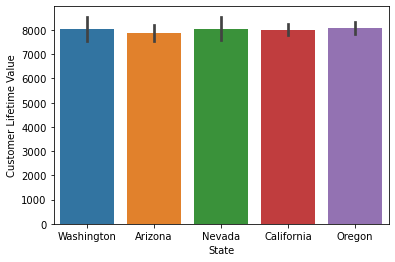

In [37]:
sns.barplot(categorical['State'], numerical['Customer Lifetime Value'])
plt.show()

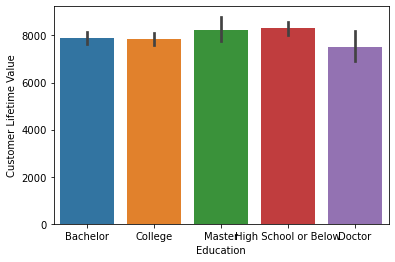

In [38]:
sns.barplot(categorical['Education'], numerical['Customer Lifetime Value'])
plt.show()

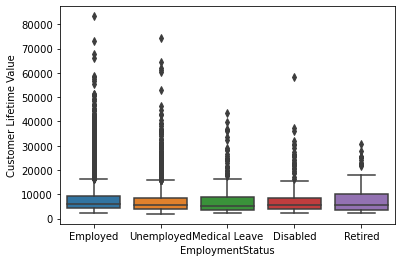

In [39]:
sns.boxplot(categorical['EmploymentStatus'], numerical['Customer Lifetime Value'])
plt.show()

In [40]:
categorical.columns

Index(['State', 'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [41]:
categorical['State'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

In [42]:
categorical['Response'].value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

In [43]:
categorical['State'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

In [44]:
def check_value_counts(df):
    for column in df.columns:
        print(f'Value counts for column "{column}":\n{df[column].value_counts()}\n')

In [45]:
check_value_counts(categorical)

Value counts for column "State":
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

Value counts for column "Response":
No     7826
Yes    1308
Name: Response, dtype: int64

Value counts for column "Coverage":
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

Value counts for column "Education":
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

Value counts for column "Effective To Date":
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157
2/12/

In [ ]:
## we can clean policy column by grouping personal corporate and special

In [46]:
numerical.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


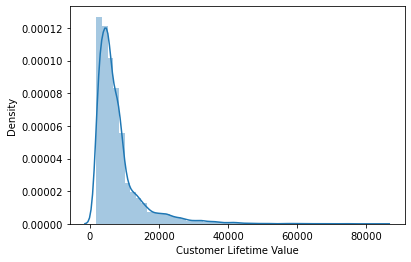

In [47]:
sns.distplot(data['Customer Lifetime Value'])
plt.show()

In [49]:
IQR = np.percentile(data['Customer Lifetime Value'], 75)- np.percentile(data['Customer Lifetime Value'], 25)
IQR

4967.915247000001

In [61]:
u_limit = np.percentile(data['Customer Lifetime Value'], 75) + 2.5*IQR
l_limit = np.percentile(data['Customer Lifetime Value'], 25) - 2.5*IQR

In [62]:
temp = data[(data['Customer Lifetime Value']<u_limit) & (data['Customer Lifetime Value']>l_limit)]

In [63]:
temp.shape

(8637, 23)

In [71]:
def remove_outliers(df, col):
    if df[col].dtype =='int' or 'float':
        iqr = np.percentile(df[col], 75) - np.percentile(df[col], 25)
        u_limit = np.percentile(df[col], 75) + 1.5*iqr
        l_limit =  np.percentile(df[col], 25) - 1.5*iqr
        temp = df[(df[col]> u_limit) |  df[(df[col]< u_limit)]
        if temp.shape[0] < .05*df.shape[0]:
                  
            df = df[(df[col]< u_limit) & ] df[(df[col]> u_limit)].reset_index(drop=True)
            return df
        else:
            print('losing too much data')
            return df      
    else:
        print('column is not numerical')
        return df          
            

SyntaxError: invalid syntax (2917588214.py, line 7)

In [73]:
def remove_outliers(df, col):
    if df[col].dtype == 'int' or df[col].dtype == 'float':
        iqr = np.percentile(df[col], 75) - np.percentile(df[col], 25)
        u_limit = np.percentile(df[col], 75) + 3*iqr
        l_limit = np.percentile(df[col], 25) - 3*iqr
        temp = df[(df[col]> u_limit) | (df[col]<l_limit)]
        if temp.shape[0] < .05*df.shape[0]:
            df = df[(df[col]< u_limit) & (df[col]>l_limit)].reset_index(drop=True)
            return df
        else:
            print('losing too much data')
            return df
    else:
        print('column in not numerical')
        return df

In [74]:
remove_outliers(data, 'Customer Lifetime Value')

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8762,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
8763,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
8764,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
8765,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [78]:
data['Effective To Date'].dtypes

dtype('O')

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [85]:
categorical['Effective To Date'] = pd.to_datetime(categorical['Effective To Date'], errors = 'coerce')

In [86]:
categorical['Effective To Date'].dtypes

dtype('<M8[ns]')

In [87]:
categorical.head()


,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [89]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   State              9134 non-null   object        
 1   Response           9134 non-null   object        
 2   Coverage           9134 non-null   object        
 3   Education          9134 non-null   object        
 4   Effective To Date  9134 non-null   datetime64[ns]
 5   EmploymentStatus   9134 non-null   object        
 6   Gender             9134 non-null   object        
 7   Location Code      9134 non-null   object        
 8   Marital Status     9134 non-null   object        
 9   Policy Type        9134 non-null   object        
 10  Policy             9134 non-null   object        
 11  Renew Offer Type   9134 non-null   object        
 12  Sales Channel      9134 non-null   object        
 13  Vehicle Class      9134 non-null   object        
 14  Vehicle 

<AxesSubplot:xlabel='Gender', ylabel='Number of Policies'>

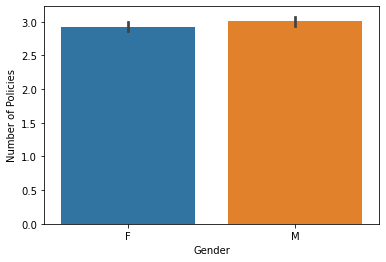

In [108]:
sns.barplot(data=data, x="Gender", y='Number of Policies') 

<AxesSubplot:xlabel='State', ylabel='Number of Policies'>

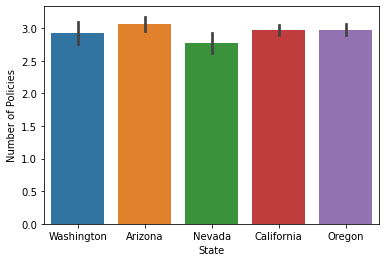

In [109]:
sns.barplot(data=data, x="State", y='Number of Policies') 

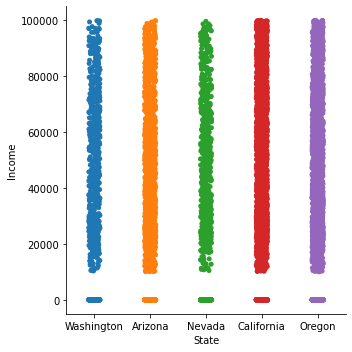

In [112]:
sns.catplot(data=data, x="State", y="Income")


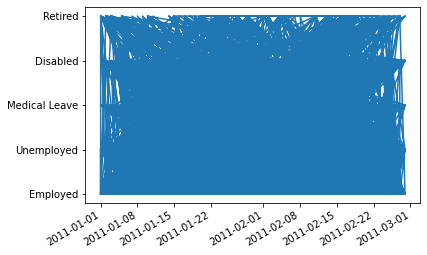

In [122]:
plt.plot(data['Effective To Date'], data['EmploymentStatus'])


plt.gcf().autofmt_xdate()

